# Micromagnetic model

## Mesh

In [1]:
import oommfc as oc

<IPython.core.display.Javascript object>


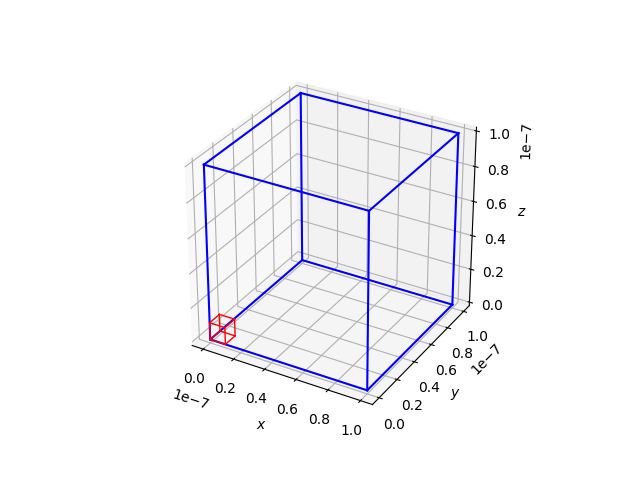

In [2]:
%matplotlib notebook
L = 100e-9
d = 10e-9
mesh = oc.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d), name="mesh")
mesh

## System

The basic block of our micromagnetic model is the system object. It is fully defined if:

1. Hamiltonian,
2. dynamics equation,
3. magnetisation.

are provided. The system is then "driven" in phase space using particular drivers.

In [3]:
system = oc.System(name="system")

## Hamiltonian

In [4]:
exchange = oc.Exchange(A=1e-12)

In [5]:
exchange

Exchange(A=1e-12)

In [6]:
exchange.A

1e-12

In [7]:
repr(exchange)

'Exchange(A=1e-12)'

In [8]:
hamiltonian = exchange + oc.Zeeman(H=(1e6, 0, 0))

In [9]:
hamiltonian

Exchange(A=1e-12) + Zeeman(H=(1000000.0, 0, 0))

In [10]:
system.hamiltonian = hamiltonian

In [11]:
system.hamiltonian.exchange.A

1e-12

In [12]:
system.hamiltonian += oc.Demag()

In [13]:
system.hamiltonian

Exchange(A=1e-12) + Zeeman(H=(1000000.0, 0, 0)) + Demag()

## Dynamics

In [14]:
system.dynamics = oc.Precession(gamma=2.211e5) + oc.Damping(alpha=0.1)

system.dynamics

Precession(gamma=221100.0) + Damping(alpha=0.1)

## Magnetisation

In [15]:
import discretisedfield as df

Ms = 8e5
m = df.Field(mesh, value=(1, 0, 1), norm=Ms, name="m")

In [16]:
m

Field(dim=3, name="m")

In [17]:
p = (50e-9, 50e-9, 5e-9)
m(p)  # sampling

array([ 565685.42494924,       0.        ,  565685.42494924])

Initialise from function:

<IPython.core.display.Javascript object>


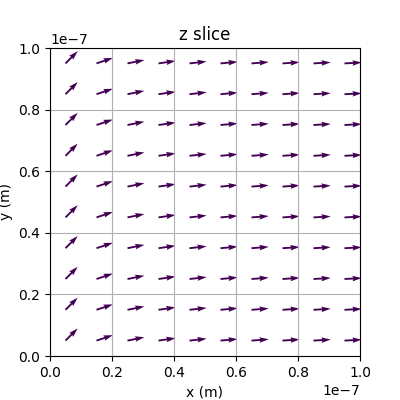

In [18]:
m.value = lambda r: (r[0]**1, r[2], 0)

m.plot_slice('z', 0., xsize=4);

In [19]:
system.m = m

## Drivers -- change the state

### Time driver

In [20]:
system.hamiltonian.zeeman.H = (1e6, 0, 0)

In [23]:
td = oc.TimeDriver()
td.drive(system, t=50e-12, n=50)

<IPython.core.display.Javascript object>


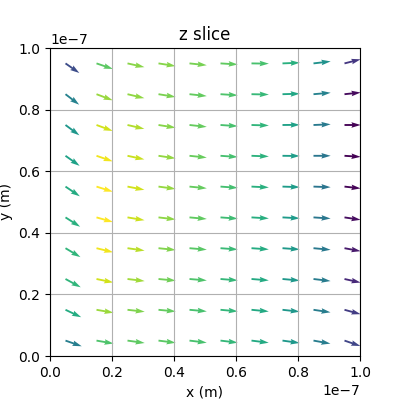

In [24]:
fig = system.m.plot_slice("z", 5e-9, xsize=4)

In [25]:
system.dt

,E,Ecount,max_dm/dt,dE/dt,deltaE,Eex,max_spin_angle,stage_max_spin_angle,run_max_spin_angle,FixedZeeman:zeeman:Energy,Ed,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-5.327919e-16,43.0,15960.409035,-0.000011,-2.291594e-18,2.859963e-19,26.447943,26.565051,26.565051,-6.646629e-16,1.315850e-16,7.0,7.0,0.0,0.661152,0.627669,0.143143,1.989794e-13,1.000000e-12
1,-5.441832e-16,56.0,15584.719159,-0.000011,-2.307428e-18,2.717401e-19,26.315805,26.447943,26.565051,-6.762893e-16,1.318344e-16,10.0,2.0,1.0,0.672717,0.575106,0.276297,2.040824e-13,2.000000e-12
2,-5.553563e-16,69.0,15075.828023,-0.000011,-3.794111e-18,2.617548e-19,26.234922,26.315805,26.565051,-6.876188e-16,1.320007e-16,13.0,2.0,2.0,0.683987,0.494957,0.392753,3.418353e-13,3.000000e-12
3,-5.663002e-16,82.0,14474.408233,-0.000011,-3.714599e-18,2.562965e-19,26.095481,26.234922,26.565051,-6.986076e-16,1.320511e-16,16.0,2.0,3.0,0.694918,0.391955,0.486810,3.418353e-13,4.000000e-12
4,-5.770050e-16,95.0,14159.091973,-0.000011,-3.631744e-18,2.551852e-19,25.847627,26.095481,26.565051,-7.092146e-16,1.319545e-16,19.0,2.0,4.0,0.705469,0.271988,0.554081,3.418353e-13,5.000000e-12
5,-5.874608e-16,108.0,14364.741071,-0.000010,-3.545546e-18,2.578704e-19,25.486144,25.847627,26.565051,-7.194017e-16,1.316831e-16,22.0,2.0,5.0,0.715602,0.141737,0.591732,3.418353e-13,6.000000e-12
6,-5.976575e-16,121.0,14661.165968,-0.000010,-3.455804e-18,2.635673e-19,25.072586,25.486144,26.565051,-7.291386e-16,1.312176e-16,25.0,2.0,6.0,0.725288,0.008274,0.598602,3.418353e-13,7.000000e-12
7,-6.075845e-16,134.0,14894.771038,-0.000010,-3.362384e-18,2.713829e-19,24.803206,25.072586,26.565051,-7.384070e-16,1.305512e-16,28.0,2.0,7.0,0.734507,-0.121355,0.575239,3.418353e-13,8.000000e-12
8,-6.172313e-16,147.0,15071.177037,-0.000010,-3.265486e-18,2.804136e-19,25.294609,25.294609,26.565051,-7.472016e-16,1.296899e-16,31.0,2.0,8.0,0.743255,-0.240535,0.523807,3.418353e-13,9.000000e-12
9,-6.265889e-16,160.0,15282.158093,-0.000009,-3.165742e-18,2.898360e-19,25.727661,25.727661,26.565051,-7.555296e-16,1.286509e-16,34.0,2.0,9.0,0.751539,-0.343444,0.447915,3.418353e-13,1.000000e-11


<IPython.core.display.Javascript object>


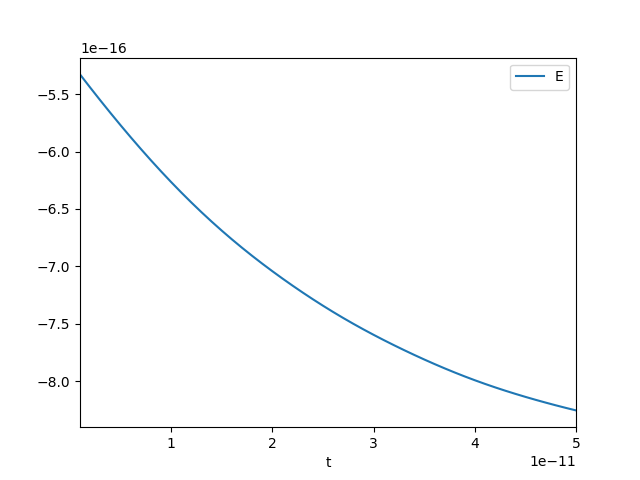

In [26]:
system.dt.plot("t", "E")

<IPython.core.display.Javascript object>


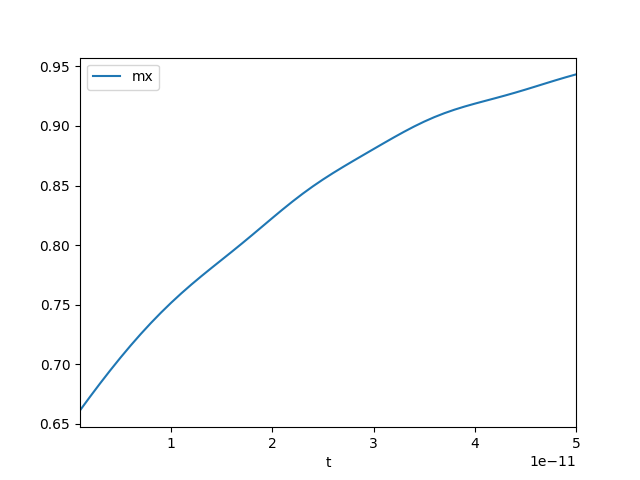

In [27]:
system.dt.plot("t", "mx")

### MinDriver: Energy minimisation

(796387.73366037896, 0.00021001016296213492, 2.8780507069313898e-05)


<IPython.core.display.Javascript object>


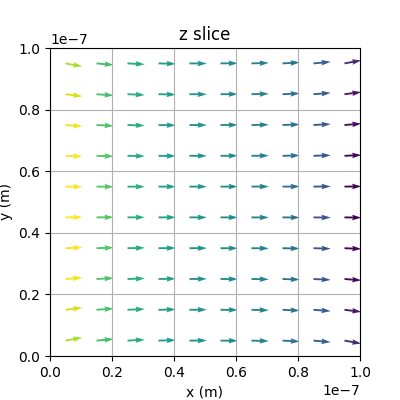

In [28]:
md = oc.MinDriver()

md.drive(system)

print(system.m.average)

fig = system.m.plot_slice("z", 5e-9, xsize=4)

<IPython.core.display.Javascript object>


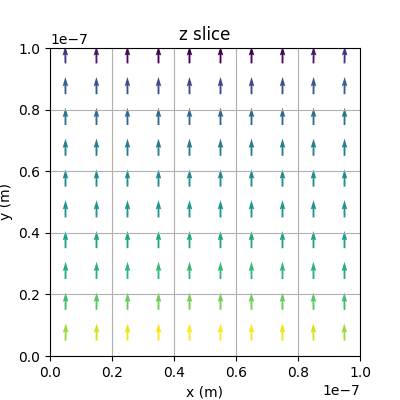

In [29]:
system.hamiltonian.zeeman.H = (0, 1e7, 0)

md.drive(system)

fig = system.m.plot_slice("z", 5e-9, xsize=4)